In [37]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [39]:
# Check the dataset for missing values
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
         Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
..        ...       ...
243  227.5250  0.750000
244  247.5208  0.500000
245  262.3750  1.000000
246  263.0000  0.500000
247  512.3292  1.000000

[248 rows x 2 columns]
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


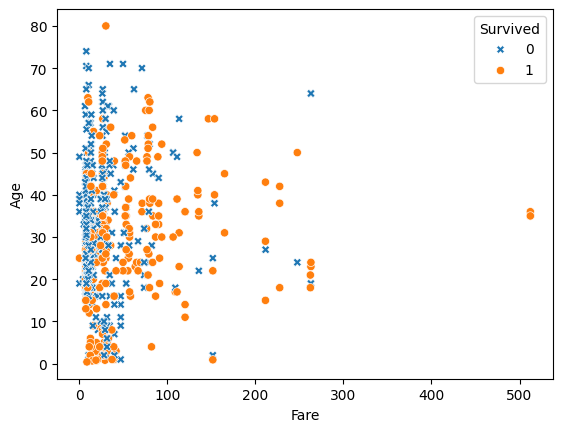

In [40]:
# Exploratory data analysis

# Find the features most associated with a passenger surviving or not
# Plot the survival rate for each feature
# Pclass
print(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

# Fare
print(train_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean())

# Embarked
print(train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

# Create a scatterplot for Fare and Age, marking the points by survival status
sns.scatterplot(x='Fare', y='Age', hue='Survived', style='Survived', markers={0: 'X', 1: 'o'}, data=train_data)
plt.show()


In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing the data
training_features = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_features = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Setting the target variable
training_labels = train_data['Survived']

# Handle missing values from Age
age_mean = training_features['Age'].mean()
training_features['Age'] = training_features['Age'].fillna(age_mean)
test_features['Age'] = test_features['Age'].fillna(age_mean)

# Handle missing values from Embarked
training_features['Embarked'] = training_features['Embarked'].fillna(training_features['Embarked'].mode()[0])

# Handle missing values from Fare
test_features['Fare'] = test_features['Fare'].fillna(test_features['Fare'].mean())

# Normalizing numerical features
scaler = StandardScaler()
training_features[['Age', 'Fare']] = scaler.fit_transform(training_features[['Age', 'Fare']])
test_features[['Age', 'Fare']] = scaler.transform(test_features[['Age', 'Fare']])

# One-hot encoding categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(training_features[['Sex', 'Embarked', 'Pclass']]).toarray()
encoded_feature_names = encoder.get_feature_names_out(['Sex', 'Embarked', 'Pclass'])
encoded_test_features = encoder.transform(test_features[['Sex', 'Embarked', 'Pclass']]).toarray()
encoded_test_features_names = encoder.get_feature_names_out(['Sex', 'Embarked', 'Pclass'])

# Create a DataFrame with the encoded features
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
encoded_test_features_df = pd.DataFrame(encoded_test_features, columns=encoded_test_features_names)

# Drop original categorical features from training_features
training_features = training_features.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
training_features = pd.concat([training_features, encoded_features_df], axis=1)
test_features = test_features.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
test_features = pd.concat([test_features, encoded_test_features_df], axis=1)

print(training_features.head())
print(test_features.head())

missing_values = test_features.isnull().sum()
print(missing_values[missing_values > 0])


        Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
0 -0.592481      1      0 -0.502445         0.0       1.0         0.0   
1  0.638789      1      0  0.786845         1.0       0.0         1.0   
2 -0.284663      0      0 -0.488854         1.0       0.0         0.0   
3  0.407926      1      0  0.420730         1.0       0.0         0.0   
4  0.407926      0      0 -0.486337         0.0       1.0         0.0   

   Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0         0.0         1.0       0.0       0.0       1.0  
1         0.0         0.0       1.0       0.0       0.0  
2         0.0         1.0       0.0       0.0       1.0  
3         0.0         1.0       1.0       0.0       0.0  
4         0.0         1.0       0.0       0.0       1.0  
        Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
0  0.369449      0      0 -0.490783         0.0       1.0         0.0   
1  1.331378      1      0 -0.507479         1.0       0.0         0

In [50]:
# K nearest neighbors on the Titanic dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(training_features, training_labels)

# Predict the labels on the test set
predictions = knn.predict(test_features)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_features['Survived'], predictions)



KeyError: 'Survived'